In [1]:
from fastai.tabular import *
from sklearn import preprocessing



In [229]:
dftrain = pd.read_csv('credit_train.csv', dtype={'Term': 'category',
                                           'Years in current job': 'category',
                                           'Home Ownership': 'category',
                                           'Purpose': 'category'})
dftest = pd.read_csv('credit_test.csv', dtype={'Term': 'category',
                                           'Years in current job': 'category',
                                           'Home Ownership': 'category',
                                           'Purpose': 'category'
                                           
                                            })

dftrain = dftrain.drop(columns=['Months since last delinquent', 'Loan ID', 'Customer ID','LoanStatus'])
dftest = dftest.drop(columns=['Months since last delinquent', 'Loan ID', 'Customer ID'])

dftrain = pd.DataFrame(dftrain.dropna())
dftest = pd.DataFrame(dftest.dropna())


In [230]:
dftrain = dftrain.drop(dftrain[dftrain['Credit Score'] > 1000].index)
dftest = dftest.drop(dftest[dftest['Credit Score'] > 1000].index)


In [148]:
cont_traindf = dftrain[['CurrentLoanAmount', 'Annual Income','Monthly Debt','Years of Credit History',
                  'Years of Credit History','Number of Open Accounts','Number of Credit Problems',
                  'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]
cont_testdf = dftest[['CurrentLoanAmount', 'Annual Income','Monthly Debt','Years of Credit History',
                  'Years of Credit History','Number of Open Accounts','Number of Credit Problems',
                  'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]

cols = cont_traindf.columns

In [225]:
dftrain['Tax Liens'].max()

15.0

In [149]:
x = cont_traindf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(cont_testdf)
dftrain_scaled = pd.DataFrame(x_scaled, columns=cols)
dftest_scaled = pd.DataFrame(y_scaled, columns=cols)

In [150]:
dftrain_scaled.head()
dftest_scaled.head()

,CurrentLoanAmount,Annual Income,Monthly Debt,Years of Credit History,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.005900,0.112383,0.292635,0.369610,0.369610,0.148148,0.0,0.038301,0.028219,0.000000,0.0
1,0.002452,0.103647,0.255175,0.320329,0.320329,0.185185,0.0,0.041852,0.024101,0.000000,0.0
2,0.001321,0.044548,0.058468,0.178645,0.178645,0.166667,0.0,0.002373,0.010340,0.000000,0.0
3,0.001548,0.039415,0.116856,0.260780,0.260780,0.277778,0.1,0.009665,0.014158,0.333333,0.0
4,0.003006,0.094735,0.275062,0.455852,0.455852,0.240741,0.0,0.022157,0.012473,0.000000,0.0


In [151]:
cont_cols = dftrain.select_dtypes(include=['float64','int64']).columns
cat_cols = dftrain.select_dtypes(exclude=['float64','int64']).columns
cont_cols = cont_cols.drop('Credit Score')

In [152]:
cont_cols

Index(['CurrentLoanAmount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [204]:
test = (TabularList.from_df(dftest, cont_names=cont_cols, cat_names=cat_cols))

In [219]:
data = (TabularList.from_df(dftrain, cont_names=cont_cols, cat_names=cat_cols)
                           .split_by_idx(list(range(800,10000)))
                           .label_from_df(cols='Credit Score')
                           .databunch())

In [220]:
data.show_batch(rows=10)

Term,Years in current job,Home Ownership,Purpose,CurrentLoanAmount,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,target
Short Term,< 1 year,Home Mortgage,Debt Consolidation,166804.0000,1048876.0000,24299.0996,16.4000,11.0000,0.0000,204801.0000,240020.0000,0.0000,0.0000,724.0
Short Term,10+ years,Own Home,Debt Consolidation,337524.0000,759620.0000,17218.1797,15.3000,14.0000,0.0000,236417.0000,343024.0000,0.0000,0.0000,697.0
Long Term,2 years,Home Mortgage,other,559570.0000,1836407.0000,40094.9414,27.2000,18.0000,0.0000,360848.0000,825726.0000,0.0000,0.0000,639.0
Short Term,6 years,Rent,Debt Consolidation,218746.0000,1511336.0000,20906.8398,13.0000,16.0000,0.0000,174971.0000,306042.0000,0.0000,0.0000,747.0
Short Term,10+ years,Rent,Debt Consolidation,357522.0000,1524560.0000,20708.6699,24.0000,15.0000,0.0000,828647.0000,1970188.0000,0.0000,0.0000,750.0
Long Term,5 years,Rent,Debt Consolidation,627264.0000,2128247.0000,25539.0391,18.6000,13.0000,0.0000,817076.0000,1185558.0000,0.0000,0.0000,633.0
Long Term,7 years,Own Home,Debt Consolidation,321794.0000,662815.0000,5909.9502,12.7000,12.0000,0.0000,102828.0000,400906.0000,0.0000,0.0000,727.0
Long Term,9 years,Home Mortgage,Debt Consolidation,230692.0000,1824323.0000,8817.5195,18.7000,12.0000,0.0000,485241.0000,1135068.0000,0.0000,0.0000,700.0
Long Term,10+ years,Home Mortgage,Debt Consolidation,454322.0000,1569514.0000,28251.0996,28.2000,13.0000,2.0000,338295.0000,859034.0000,0.0000,1.0000,710.0
Short Term,4 years,Home Mortgage,Debt Consolidation,196614.0000,1792365.0000,17774.3105,20.8000,13.0000,0.0000,477204.0000,1001000.0000,0.0000,0.0000,744.0


In [249]:
learn = tabular_learner(data, layers=[200,50], metrics= mean_absolute_error, wd=0.01)

In [250]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


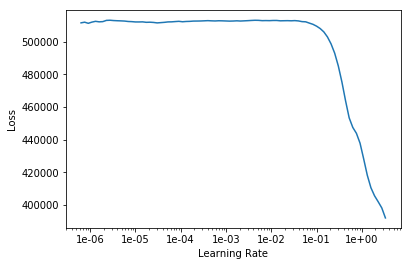

In [251]:
learn.recorder.plot()

In [252]:
learn.fit_one_cycle(10, 2e-1)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,575.230469,607.083252,18.510290,00:58
1,622.466248,10093116.000000,87.659775,00:52
2,642.423523,656.998474,19.137808,00:51
3,632.463196,219290.968750,36.238434,00:49
4,611.862183,1666006777856.000000,37993.109375,00:49
5,603.823914,762412400640.000000,14050.354492,00:51
6,573.601074,406536.437500,33.364735,00:51
7,542.441345,912077248.000000,589.892700,00:51
8,547.278870,1636990336.000000,923.189697,00:48
9,525.520752,1514113024.000000,938.175842,00:48


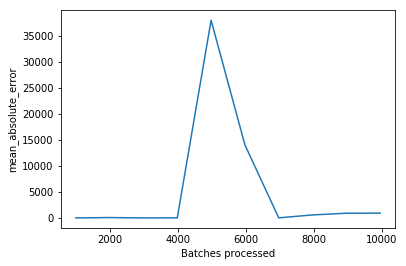

In [257]:
learn.recorder.plot_metrics()